# Assignment 1

**Deadline**:  Sunday 21 November, 23.59.

Your notebook should not give errors when executed with `Run All`. Please submit your answers via [Canvas](https://canvas.uva.nl/courses/25150/assignments/248822).

| |Name |Student number|Email|
|:-|:----|:-------------|:----|
|1.|Jinhyun Kim  |11968850        |kjin19930000@gmail.com     |
|2.|Yechan Kim  |11630655        |kkyc1227@naver.com     |

****Hand in the following****:
* Your notebook. N.B. **click on `Kernel`, then `Restart & Run All`** before submitting, see notes.
* A (printed) pdf version of your notebook.

****NOTES****:
* The assignment is a partial stand-in for a final examination, so the usual rules regarding plagiarism and fraud apply, with all attendant consequences. Code found on the internet or elsewhere is not acceptable as a solution.
* Before submitting your work, **click on `Kernel`, then `Restart & Run All`** and verify that your notebook produces the desired results and does not error.
* Make sure that any function you write has a docstring, and comments where appropriate.
* Some questions require you to write code to obtain a numerical result (e.g., an option price). In that case, don't just give the function, but also the result of calling it with the given parameter values (i.e., the numerial value that it returns). If your function uses random numbers, then set the seed to 0 before calling it. This makes it much easier to grade the assignments (at least as long as the answer is correct).
* How to convert your notebook to pdf: The easiest way is probably to use your browser's print functionality: e.g. in Chrome, press the three dots to go to Options, select 'Print...', and then select 'save as pdf' as Destination. I usually set it to 70% zoom such that the output fits the printed pdf pages.

**Declaration of Originality**:

We whose names are given under 1. and 2. above declare that
1. These solutions are solely our own work.
2. We have not made these solutions available to any other student.

## Question 1: Testing the CAPM
The CAPM implies that
\begin{equation*}
E(R_{i}-R_{f})=\beta _{i}E(R_{m}-R_{f}),\qquad \beta _{i}=\frac{\mathrm{cov}%
(R_{i},R_{m})}{\mathrm{var}(R_{m})},
\end{equation*}

where $R_i$ is the return on a stock, and $R_m$ is the market return. Suppose we have time series on $n$ different stock or portfolio returns $\{R_{it},i=1,\ldots ,n\}_{t=1}^{T}$ and on a "market return" (value weighted index) $\{R_{mt}\}_{t=1}^{T}$.  We also have observations on a risk-free interest rate $\{R_{ft}\}_{t=1}^{T}$ and construct with these the excess returns $r_{it}=R_{it}-R_{ft}$ and $r_{mt}=R_{mt}-R_{ft}$. Now $\beta_i$ can be estimated from the time-series regression \begin{equation*}
r_{it}=\alpha _{i}+\beta _{i}r_{mt}+\varepsilon _{it},\qquad t=1,\ldots ,T.
\end{equation*}

One way to test the CAPM is as follows: denote by $\bar{r}_{i}$
and $\hat{\beta}_{i}$ the average excess return and estimated $\beta$ of stock $i$. If the model $E(r_{i})=\beta_{i}E(r_{m})$ is valid, then $(\hat{\beta}_{i},\bar{r}_{i})$ should lie on a line with zero intercept and slope $\lambda =E(r_{mt})$. This line is called the *security market line*, and $\lambda$ is known as the *market risk premium*.

We can estimate $\lambda $ by OLS in the cross-section regression
\begin{equation*}
\bar{r}_{i}=\lambda \hat{\beta}_{i}+\alpha _{i},\qquad i=1,\ldots ,n.
\end{equation*}
Note that $\hat{\beta_i}$ is the regressor, $\lambda$ the coefficient, and $\alpha_i$ the error term.

The assignment is to estimate the CAPM betas of the 30 constituent stocks of the Dow (using the return on the Dow as the market return, and the 3 month T-bill rate as the risk-free rate), then estimate the above cross-section regression, and finally make a plot of the security market line superimposed on a scatter plot of $(\hat{\beta}_{i},\bar{r}_{i})$.

dafsd


**1.1** Import the relevant libraries:

In [9]:
import math
import numpy as np
import pandas as pd
import pandas_datareader.data as web
import datetime
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import matplotlib.lines as mlines
import matplotlib.transforms as mtransforms
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.linear_model import LinearRegression

ModuleNotFoundError: No module named 'pandas'

**1.2** Obtain, from the FRED database, the daily adjusted closing prices of the Dow Jones Industrial Average (DJIA) from 31/12/2011 to 30/09/2021. Convert them into percentage log returns $r_t=100 \times \log(P_t/P_{t-1})$ and store them in a DataFrame `df_1`, which has the date as index and 'DJIA' as column name:

In [ ]:
start = datetime.datetime(2011,12,31)
end = datetime.datetime(2021,9,30)

# The initial index was DJIA. So we have resetted the index to set 'Date' as an index.
df_1 = web.DataReader('DJIA','fred',start,end).reset_index()

# Change columns of 'DATE' into Datetime data
df_1['DATE'] = pd.to_datetime(df_1['DATE'])

# Set 'Date' as index
df_1.set_index('DATE', inplace = True); df_1

,DJIA
DATE,
2012-01-02,NaN
2012-01-03,12397.38
2012-01-04,12418.42
2012-01-05,12415.70
2012-01-06,12359.92
...,...
2021-09-24,34798.00
2021-09-27,34869.37
2021-09-28,34299.99


In [ ]:
df_1 = 100*(np.log(df_1) - np.log(df_1).shift(1)); df_1

,DJIA
DATE,
2012-01-02,NaN
2012-01-03,NaN
2012-01-04,0.169569
2012-01-05,-0.021905
2012-01-06,-0.450282
...,...
2021-09-24,0.095396
2021-09-27,0.204888
2021-09-28,-1.646373


**1.3** Obtain, also from the FRED database, daily data on the 3-month T-bill rate (DTB3) for the same period and divide them by 365:

In [ ]:
start = datetime.datetime(2011,12,31)
end   = datetime.datetime(2021,9,30)
rf    = web.DataReader('DTB3','fred',start,end).reset_index()

# Change columns of 'DATE' into Datetime data
rf['DATE'] = pd.to_datetime(rf['DATE'])

# Set 'DATE' as index
rf.set_index('DATE', inplace = True)

# Divide T-bill rate by 365
rf = rf/365; rf

,DTB3
DATE,
2012-01-02,NaN
2012-01-03,0.000055
2012-01-04,0.000055
2012-01-05,0.000055
2012-01-06,0.000055
...,...
2021-09-24,0.000082
2021-09-27,0.000110
2021-09-28,0.000110


**1.4** The csv file `tickerdata.csv` which has been provided with this assignment contains the adjusted closing prices for the 30 constituent stocks of the Dow Jones.

Import the dataset into a second DataFrame `df_2`, convert the `Date`-column to datetime, and make the `Date`-column the new index:

In [ ]:
df_2 = pd.read_csv(r'.\tickerdata.csv', index_col=0).reset_index()

# Change columns of 'DATE' into Datetime data
df_2['Date'] = pd.to_datetime(df_2['Date'])

# Set 'DATE' as index
df_2.set_index('Date', inplace = True); df_2

,AAPL,AMGN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,DD,...,MRK,MSFT,NKE,PG,TRV,UNH,V,VZ,WBA,WMT
Date,,,,,,,,,,,,,,,,,,,,,
2012-01-03,12.610315,50.510731,41.869728,60.731098,71.366051,25.299999,13.845226,73.995338,34.300625,32.105747,...,26.613436,21.707487,21.615437,49.415882,46.729477,44.211430,24.047722,25.347017,25.659273,48.089436
2012-01-04,12.678082,50.234978,41.895790,60.821098,72.026718,24.370001,14.112767,73.867928,34.784103,32.278187,...,26.641226,22.218348,21.930258,49.393711,46.539356,44.855392,23.618088,25.015272,25.480762,47.595230
2012-01-05,12.818840,50.747097,42.382149,60.166496,72.535507,24.692499,14.060745,73.143867,35.366070,32.482964,...,26.919172,22.445393,21.916859,49.186668,46.998802,45.155922,23.795546,24.843014,25.395391,47.364075
2012-01-06,12.952843,51.022858,41.921841,60.534721,72.717773,25.264999,14.008723,72.614235,35.733166,32.676949,...,26.731556,22.794075,21.878901,49.068359,47.014660,45.319073,23.515348,24.771923,25.674795,47.029282
2012-01-09,12.932299,50.581646,42.026062,60.984764,73.735329,25.187500,14.097905,73.405342,35.589920,32.666180,...,26.675970,22.494049,21.959282,49.275391,47.283974,45.267555,23.326220,24.797773,26.000774,47.172764
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-24,146.919998,213.610001,175.284256,221.389999,196.820007,285.630005,56.349331,100.599998,176.000000,68.250000,...,73.610001,299.350006,149.589996,142.665588,156.460007,407.079987,231.589996,53.731880,48.310001,143.169998
2021-09-27,145.369995,213.110001,176.331650,224.160004,200.000000,279.679993,55.842754,102.970001,178.259995,70.110001,...,73.360001,294.170013,148.039993,140.787231,156.289993,405.269989,229.600006,53.830708,48.799999,142.250000
2021-09-28,141.910004,212.270004,172.710648,218.410004,200.550003,272.279999,55.147453,103.360001,174.520004,69.050003,...,73.320000,283.519989,145.300003,139.723816,153.490005,398.619995,225.559998,53.524345,48.090000,140.500000


**1.5** Using a `for` loop (over the columns), convert all the given adjusted closing prices into percentage log returns $r_t=100\log(P_t/P_{t-1})$:

In [ ]:
for company in list(df_2.columns):
    df_2[company] = 100*(np.log(df_2[company]) - np.log(df_2[company]).shift(1))

df_2

,AAPL,AMGN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,DD,...,MRK,MSFT,NKE,PG,TRV,UNH,V,VZ,WBA,WMT
Date,,,,,,,,,,,,,,,,,,,,,
2012-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-04,0.535956,-0.547425,0.062226,0.148085,0.921486,-3.745146,1.913936,-0.172336,1.399691,0.535662,...,0.104367,2.326118,1.445960,-0.044876,-0.407684,1.446047,-1.802742,-1.317454,-0.698128,-1.032997
2012-01-05,1.104125,1.014286,1.154191,-1.082108,0.703906,1.314662,-0.369298,-0.985045,1.659240,0.632408,...,1.037890,1.016695,-0.061117,-0.420049,0.982379,0.667762,0.748555,-0.690995,-0.335604,-0.486852
2012-01-06,1.039931,0.541931,-1.092031,0.610145,0.250963,2.292049,-0.370666,-0.726731,1.032639,0.595414,...,-0.699402,1.541527,-0.173342,-0.240820,0.033735,0.360654,-1.184507,-0.286570,1.094206,-0.709360
2012-01-09,-0.158732,-0.868494,0.248300,0.740696,1.389621,-0.307217,0.634599,1.083574,-0.401682,-0.032961,...,-0.208157,-1.324985,0.366719,0.421037,0.571195,-0.113742,-0.807530,0.104299,1.261654,0.304627
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-24,0.061274,-0.671865,1.352151,0.131073,0.101674,2.757995,0.070532,0.538226,-0.141945,-0.947877,...,0.763671,-0.070125,-6.464718,-0.444840,0.281620,-0.233100,1.426421,-0.091918,-0.310009,0.279775
2021-09-27,-1.060603,-0.234346,0.595762,1.243425,1.602772,-2.105122,-0.903058,2.328545,1.275913,2.688801,...,-0.340206,-1.745560,-1.041573,-1.325359,-0.108722,-0.445621,-0.862986,0.183758,1.009169,-0.644665
2021-09-28,-2.408910,-0.394940,-2.074896,-2.598605,0.274624,-2.681512,-1.252922,0.378035,-2.120376,-1.523452,...,-0.054542,-3.687525,-1.868187,-0.758202,-1.807776,-1.654491,-1.775250,-0.570747,-1.465604,-1.237858


**1.6** Concatenate DataFrames `df_1` and `df_2` along the common axis to a final DataFrame `df`:


Notes (also hold for next question):
* Need to specify the axis
* `dtype` of the indices should be the same

In [ ]:
# Check whether dtype of the indices are the same
print(df_1.index.dtype, df_2.index.dtype, rf.index.dtype)

datetime64[ns] datetime64[ns] datetime64[ns]


In [ ]:
df = pd.concat([df_1,df_2], axis =1)
df

,DJIA,AAPL,AMGN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,...,MRK,MSFT,NKE,PG,TRV,UNH,V,VZ,WBA,WMT
2012-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-04,0.169569,0.535956,-0.547425,0.062226,0.148085,0.921486,-3.745146,1.913936,-0.172336,1.399691,...,0.104367,2.326118,1.445960,-0.044876,-0.407684,1.446047,-1.802742,-1.317454,-0.698128,-1.032997
2012-01-05,-0.021905,1.104125,1.014286,1.154191,-1.082108,0.703906,1.314662,-0.369298,-0.985045,1.659240,...,1.037890,1.016695,-0.061117,-0.420049,0.982379,0.667762,0.748555,-0.690995,-0.335604,-0.486852
2012-01-06,-0.450282,1.039931,0.541931,-1.092031,0.610145,0.250963,2.292049,-0.370666,-0.726731,1.032639,...,-0.699402,1.541527,-0.173342,-0.240820,0.033735,0.360654,-1.184507,-0.286570,1.094206,-0.709360
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-24,0.095396,0.061274,-0.671865,1.352151,0.131073,0.101674,2.757995,0.070532,0.538226,-0.141945,...,0.763671,-0.070125,-6.464718,-0.444840,0.281620,-0.233100,1.426421,-0.091918,-0.310009,0.279775
2021-09-27,0.204888,-1.060603,-0.234346,0.595762,1.243425,1.602772,-2.105122,-0.903058,2.328545,1.275913,...,-0.340206,-1.745560,-1.041573,-1.325359,-0.108722,-0.445621,-0.862986,0.183758,1.009169,-0.644665
2021-09-28,-1.646373,-2.408910,-0.394940,-2.074896,-2.598605,0.274624,-2.681512,-1.252922,0.378035,-2.120376,...,-0.054542,-3.687525,-1.868187,-0.758202,-1.807776,-1.654491,-1.775250,-0.570747,-1.465604,-1.237858
2021-09-29,0.264170,0.646205,1.231371,-0.928408,3.132508,-1.345338,-0.655885,-0.072076,-0.029028,-1.059924,...,2.385393,0.169161,0.494304,1.012014,0.901520,0.448046,0.495311,0.405382,1.281007,-0.042712


**1.7** Convert the raw returns in `df` to excess returns by subtracting the `pandas` series `rf` from all columns:

In [ ]:
df = df.sub(rf['DTB3'], axis = 'index')
df

,DJIA,AAPL,AMGN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,...,MRK,MSFT,NKE,PG,TRV,UNH,V,VZ,WBA,WMT
2012-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-04,0.169515,0.535901,-0.547480,0.062171,0.148030,0.921431,-3.745201,1.913882,-0.172391,1.399636,...,0.104312,2.326064,1.445906,-0.044931,-0.407739,1.445992,-1.802797,-1.317509,-0.698183,-1.033052
2012-01-05,-0.021960,1.104071,1.014232,1.154136,-1.082163,0.703851,1.314607,-0.369352,-0.985099,1.659185,...,1.037835,1.016640,-0.061172,-0.420104,0.982324,0.667707,0.748501,-0.691050,-0.335658,-0.486907
2012-01-06,-0.450337,1.039876,0.541876,-1.092085,0.610090,0.250909,2.291995,-0.370721,-0.726786,1.032584,...,-0.699457,1.541472,-0.173396,-0.240875,0.033680,0.360599,-1.184562,-0.286625,1.094151,-0.709415
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-24,0.095314,0.061192,-0.671947,1.352069,0.130991,0.101591,2.757913,0.070449,0.538144,-0.142027,...,0.763589,-0.070207,-6.464800,-0.444922,0.281538,-0.233183,1.426339,-0.092000,-0.310091,0.279693
2021-09-27,0.204778,-1.060712,-0.234455,0.595652,1.243315,1.602663,-2.105231,-0.903168,2.328436,1.275804,...,-0.340315,-1.745670,-1.041683,-1.325469,-0.108831,-0.445730,-0.863096,0.183648,1.009059,-0.644775
2021-09-28,-1.646483,-2.409020,-0.395049,-2.075005,-2.598715,0.274514,-2.681622,-1.253031,0.377925,-2.120485,...,-0.054651,-3.687634,-1.868297,-0.758312,-1.807885,-1.654601,-1.775360,-0.570857,-1.465713,-1.237968
2021-09-29,0.264060,0.646095,1.231261,-0.928517,3.132398,-1.345448,-0.655994,-0.072186,-0.029137,-1.060034,...,2.385283,0.169051,0.494194,1.011904,0.901411,0.447937,0.495201,0.405273,1.280897,-0.042822


**1.8** Drop all rows from `df` that contain at least one NaN:

In [ ]:
df = df.dropna()
df

,DJIA,AAPL,AMGN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,...,MRK,MSFT,NKE,PG,TRV,UNH,V,VZ,WBA,WMT
2012-01-04,0.169515,0.535901,-0.547480,0.062171,0.148030,0.921431,-3.745201,1.913882,-0.172391,1.399636,...,0.104312,2.326064,1.445906,-0.044931,-0.407739,1.445992,-1.802797,-1.317509,-0.698183,-1.033052
2012-01-05,-0.021960,1.104071,1.014232,1.154136,-1.082163,0.703851,1.314607,-0.369352,-0.985099,1.659185,...,1.037835,1.016640,-0.061172,-0.420104,0.982324,0.667707,0.748501,-0.691050,-0.335658,-0.486907
2012-01-06,-0.450337,1.039876,0.541876,-1.092085,0.610090,0.250909,2.291995,-0.370721,-0.726786,1.032584,...,-0.699457,1.541472,-0.173396,-0.240875,0.033680,0.360599,-1.184562,-0.286625,1.094151,-0.709415
2012-01-09,0.264753,-0.158760,-0.868521,0.248273,0.740668,1.389594,-0.307245,0.634572,1.083546,-0.401709,...,-0.208185,-1.325012,0.366692,0.421009,0.571168,-0.113769,-0.807558,0.104271,1.261627,0.304599
2012-01-10,0.561440,0.357324,2.263841,0.576917,0.628548,2.902789,3.931561,-0.740808,-0.393557,-0.302430,...,0.337979,0.359771,0.121881,-0.466301,0.684499,-0.189927,-0.100214,0.519852,2.651065,-0.236870
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-24,0.095314,0.061192,-0.671947,1.352069,0.130991,0.101591,2.757913,0.070449,0.538144,-0.142027,...,0.763589,-0.070207,-6.464800,-0.444922,0.281538,-0.233183,1.426339,-0.092000,-0.310091,0.279693
2021-09-27,0.204778,-1.060712,-0.234455,0.595652,1.243315,1.602663,-2.105231,-0.903168,2.328436,1.275804,...,-0.340315,-1.745670,-1.041683,-1.325469,-0.108831,-0.445730,-0.863096,0.183648,1.009059,-0.644775
2021-09-28,-1.646483,-2.409020,-0.395049,-2.075005,-2.598715,0.274514,-2.681622,-1.253031,0.377925,-2.120485,...,-0.054651,-3.687634,-1.868297,-0.758312,-1.807885,-1.654601,-1.775360,-0.570857,-1.465713,-1.237968
2021-09-29,0.264060,0.646095,1.231261,-0.928517,3.132398,-1.345448,-0.655994,-0.072186,-0.029137,-1.060034,...,2.385283,0.169051,0.494194,1.011904,0.901411,0.447937,0.495201,0.405273,1.280897,-0.042822


**1.9** Use a `for` loop to estimate a CAPM time series regression for each stock, and store the estimated slope coefficient in a list. 

*Hint*: use string interpolation to construct the regression equation and use the list `tickers` below, containing the ticker symbols of all 30 constituent stocks of the DJIA.

In [ ]:
tickers = ["AAPL", "AMGN", "AXP", "BA", "CAT", "CRM", "CSCO", "CVX", "DIS", "DD",
            "GS", "HD", "HON", "IBM", "INTC", "JNJ", "JPM", "KO", "MCD", "MMM", 
            "MRK", "MSFT", "NKE", "PG", "TRV", "UNH", "V", "VZ", "WBA","WMT"]

In [ ]:
# Make an empty list to store beta coefficients.
coefficients = []

for company in tickers:
    # Calculate the beta coefficient [Y: each companies' excess return , X: market excess return(DJIA)]
    results = smf.ols(f'{company} ~ + DJIA', data = df ).fit(cov_type ='HAC', cov_kwds = {'maxlags':5})
    
    # Append coefficients value to the list
    coefficients.append(list(results.params)[1]) 
    
print(coefficients)

[1.0123805371791255, 0.843988927715863, 1.2671965532092107, 1.5463056653992624, 1.1613003720474415, 1.0584249037686941, 0.9946973373365449, 1.2105287443091637, 0.9877328533294722, 1.1823931518044413, 1.2938977147341704, 0.9904804122066535, 1.0687956998065264, 0.9701575607860278, 1.1111529041488157, 0.6658307234508303, 1.2496648246365416, 0.6751687869344226, 0.7802988996874127, 0.9078587551384661, 0.684405568512989, 1.0580233898967402, 0.9307321413785773, 0.6098461363854876, 0.9614686396139731, 1.0044320758791154, 1.0803973954604007, 0.5364298211547747, 0.840926007747768, 0.5286295956180214]


**1.10** Create a new dataframe that has `tickers` as index, and two columns: `beta`, containing the 30 estimated betas, and `meanret`, containing the mean excess returns of the 30 stocks:

In [ ]:
# Make a beta dataframe that contains the coefficient value of companies
beta = pd.DataFrame(coefficients, index=tickers, columns=['beta']); beta

# Make a dataframe that has the mean excess return of each companies during the whole period
meanret = pd.DataFrame(np.mean(df[tickers], axis = 0), index= tickers, columns=['meanret']); meanret

# Concatenate beta and meanret dataframes 
new_df = pd.concat([beta, meanret], axis =1); new_df


,beta,meanret
AAPL,1.012381,0.089613
AMGN,0.843989,0.061284
AXP,1.267197,0.055363
BA,1.546306,0.051763
CAT,1.161300,0.047535
CRM,1.058425,0.092926
CSCO,0.994697,0.052445
CVX,1.210529,0.015262
DIS,0.987733,0.062255
DD,1.182393,0.045482


**1.11** Estimate the security market line by a cross-sectional regression (without intercept), and print a summary of the result:

In [ ]:
coefficients_c_s = []
for company in tickers:
    results = smf.ols(f'{company} ~ -1 + DJIA', data = df ).fit(cov_type ='HAC', cov_kwds = {'maxlags':5})
    print(results.summary2())

                        Results: Ordinary least squares
Model:                  OLS              Adj. R-squared (uncentered): 0.362    
Dependent Variable:     AAPL             AIC:                         8346.2905
Date:                   2021-11-20 16:47 BIC:                         8352.0510
No. Observations:       2346             Log-Likelihood:              -4172.1  
Df Model:               1                F-statistic:                 938.0    
Df Residuals:           2345             Prob (F-statistic):          1.42e-173
R-squared (uncentered): 0.363            Scale:                       2.0531   
-------------------------------------------------------------------------------------
           Coef.        Std.Err.          z          P>|z|        [0.025       0.975]
-------------------------------------------------------------------------------------
DJIA       1.0141         0.0331       30.6270       0.0000       0.9492       1.0790
----------------------------------------

                        Results: Ordinary least squares
Model:                  OLS              Adj. R-squared (uncentered): 0.532    
Dependent Variable:     CVX              AIC:                         7550.6935
Date:                   2021-11-20 16:47 BIC:                         7556.4540
No. Observations:       2346             Log-Likelihood:              -3774.3  
Df Model:               1                F-statistic:                 397.9    
Df Residuals:           2345             Prob (F-statistic):          6.78e-82 
R-squared (uncentered): 0.532            Scale:                       1.4626   
-------------------------------------------------------------------------------------
           Coef.        Std.Err.          z          P>|z|        [0.025       0.975]
-------------------------------------------------------------------------------------
DJIA       1.2094         0.0606       19.9467       0.0000       1.0905       1.3282
----------------------------------------


                        Results: Ordinary least squares
Model:                  OLS              Adj. R-squared (uncentered): 0.450    
Dependent Variable:     MCD              AIC:                         6269.8770
Date:                   2021-11-20 16:47 BIC:                         6275.6374
No. Observations:       2346             Log-Likelihood:              -3133.9  
Df Model:               1                F-statistic:                 241.9    
Df Residuals:           2345             Prob (F-statistic):          5.49e-52 
R-squared (uncentered): 0.450            Scale:                       0.84728  
-------------------------------------------------------------------------------------
           Coef.        Std.Err.          z          P>|z|        [0.025       0.975]
-------------------------------------------------------------------------------------
DJIA       0.7807         0.0502       15.5528       0.0000       0.6823       0.8791
---------------------------------------

                        Results: Ordinary least squares
Model:                  OLS              Adj. R-squared (uncentered): 0.520    
Dependent Variable:     TRV              AIC:                         6590.7256
Date:                   2021-11-20 16:47 BIC:                         6596.4860
No. Observations:       2346             Log-Likelihood:              -3294.4  
Df Model:               1                F-statistic:                 161.6    
Df Residuals:           2345             Prob (F-statistic):          7.39e-36 
R-squared (uncentered): 0.520            Scale:                       0.97146  
-------------------------------------------------------------------------------------
           Coef.        Std.Err.          z          P>|z|        [0.025       0.975]
-------------------------------------------------------------------------------------
DJIA       0.9621         0.0757       12.7133       0.0000       0.8138       1.1104
----------------------------------------

**1.12** Make a scatter plot of $(\hat{\beta}_{i},\bar{r}_{i})$ and overlay it with a red regression line (the security market line). Add a title and legend, and label the axes:

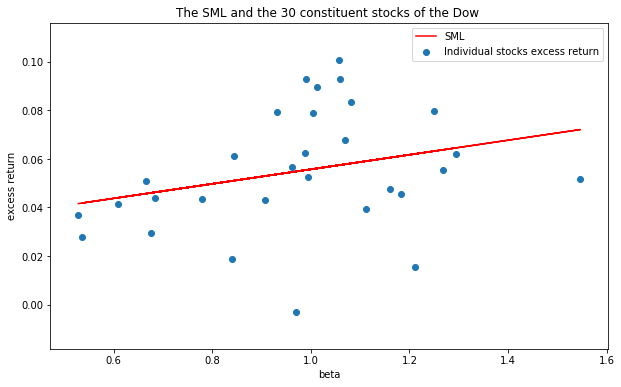

In [ ]:
# Set up linear regression model
linear_model = LinearRegression()
X, y   = beta, meanret 
linear_model.fit(X,y) # Fitting the linear model with data beta(X) and meanret(y)

# Plotting graphs
plt.figure(figsize=(10, 6))
matplotlib.pyplot.scatter(new_df['beta'], new_df['meanret'], alpha=1, label ='Individual stocks excess return')
plt.plot(X, linear_model.predict(X),color='r', label ='SML')

# Add a legend  
plt.legend()
plt.title('The SML and the 30 constituent stocks of the Dow ')
plt.xlabel("beta")
plt.ylabel("excess return")
plt.show()

## Question 2: Value at Risk
In this question we construct a VaR estimates for two stocks, one high risk and one low risk stock. Further, for the high risk stock, we split the sample into two periods to evaluate the VaR out-of-sample. You can re-use the data from the previous question.

**2.1** Use the above estimates to identify the most risky and the least risky stock in terms of their estimated betas. Create two `pandas` series `r_hirisk` and `r_lorisk` from the `df` DataFrame.

In [ ]:
print('The highest risk stock :', new_df['beta'].idxmax()) # Check which stock has the highest beta
print('The lowest risk stock  :', new_df['beta'].idxmin()) # Check which stock has the lowest beta

r_hirisk = df[new_df['beta'].idxmax()]
r_lorisk = df[new_df['beta'].idxmin()]

The highest risk stock : BA
The lowest risk stock  : WMT


**2.2** For both stocks, create a 1% VaR estimate, assuming a $t$ distribution. Comment on the difference between the estimates.

In [ ]:
df, m, h = stats.t.fit(r_hirisk)  # Fit a location-scale t distribution to r_hirisk
h_VaR_t = -stats.t.ppf(0.01, df, loc=m, scale=h) 
h_VaR_t, m, h, df

(6.021746594349676, 0.06691272736983948, 1.1245007600225838, 2.472251444766809)

In [ ]:
df, m, h = stats.t.fit(r_lorisk)  # Fit a location-scale t distribution to r_lorisk
l_VaR_t = -stats.t.ppf(0.01, df, loc=m, scale=h) 
l_VaR_t, m, h, df

(3.0781231140095766,
 0.04819412908876472,
 0.7296458256790824,
 3.237626652530147)

### Interpretation

1% Var estimate is larger when the stock has more risk. The highest risk stock BA shows 6.021 1% VaR. The lowest risk stock WMT has 3.078 1% Var which is almost half size of BA's 1% Var. This means the risk of holding BA stock is twice risker than mananging WMT stock.

**Answer the following questions for the *risky stock* only.**

**2.3** Test the fit of the Student's *t* distribution using a QQ plot, and give a conclusion in words.

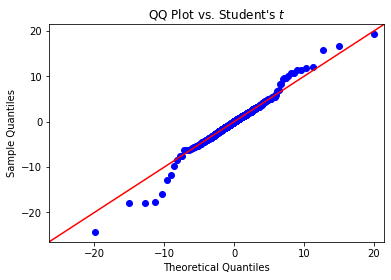

In [ ]:
sm.qqplot(r_hirisk , dist=stats.t, fit=True, line='45')
plt.title("QQ Plot vs. Student's $t$")
plt.show()


### Interpretation.

If the data follow student's t distribution well, most points would be close to the line. From the graph above, we can see some heavy tails on both right and left side. From theoretical quantile -8 to the left end point, data are right skewed. Addtionally, data from 8 qauntile to the right end point are left skewed. However, we can see that data between at around -7 quantile and  8 quantile follows student's t distribution quite well. 

**2.4** Make a plot consisting of two subplots, the left of which shows $-R_t$ and $VaR^{0.01}$, and the right panel showing a histogram of $R_t$ overlaid with the fitted Student's *t* distribution. Make sure to add title, legend, and axis labels.

*Hint*: The Value at Risk $VaR^{0.01}$ is constant over time, so the plot of the VaR will be a horizontal line.

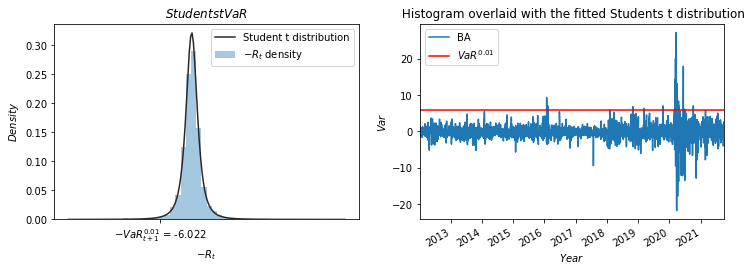

In [ ]:
fig = plt.figure(figsize=(12, 4))
fig2 = plt.subplot(121)
ax = sns.distplot(-r_hirisk, kde=False, fit=stats.t) 
ax.set_xticks([-h_VaR_t])
ax.set_xticklabels(['$-VaR_{t+1}^{0.01}$ = -%4.3f' %h_VaR_t])
fig2.legend(labels=['Student t distribution','$-R_t$ density'], loc='upper right')
plt.xlabel("$-R_t$")
plt.ylabel("$Density$")
plt.title('$Students t VaR$')
plt.subplot(122)
plt.title(' Histogram overlaid with the fitted Students t distribution')
negative_return_h = -r_hirisk
negative_return_h.plot()
plt.axhline(y=h_VaR_t, color='r', linestyle='-', label ='$VaR^{0.01}$')
plt.xlabel("$Year$")
plt.ylabel("$Var$")
plt.legend()
plt.show()

**2.5** Finally, split the sample of `r_hirisk` into two parts: one sample from 2012-2019, and one sample from 2020-2021. Use the first sample (2012-2019) to compute the 1% VaR assuming a Student's $t$ distribution as before. Then, use the second sample to evaluate the VaR by counting the number of exceedances in the period 2020-2021. Give a conclusion in words.

*Bonus* Does your conclusion change if you evaluate the VaR based on returns in 2021 only?

In [ ]:
before = r_hirisk[:'2019'] ; before
after  = r_hirisk['2020':] ; after

2020-01-03   -0.172225
2020-01-06    0.289875
2020-01-07    1.050986
2020-01-08   -1.771929
2020-01-09    1.484563
                ...   
2021-09-24    0.130991
2021-09-27    1.243315
2021-09-28   -2.598715
2021-09-29    3.132398
2021-09-30   -2.434543
Name: BA, Length: 423, dtype: float64

In [ ]:
df, m, h = stats.t.fit(before)  #fit a location-scale t distribution to r
VaR_t = -stats.t.ppf(0.01, df, loc=m, scale=h) #or -m-h*stats.t.ppf(0.01, df, loc=0, scale=1)
VaR_t, m, h, df

(3.8420451768997284,
 0.10363356474126169,
 1.0661126798390996,
 4.091651330571398)

In [ ]:
df, m, h = stats.t.fit(after)  # Fit a location-scale t distribution to r
VaR_t = -stats.t.ppf(0.01, df, loc=m, scale=h) #or -m-h*stats.t.ppf(0.01, df, loc=0, scale=1)
VaR_t, m, h, df

(13.770377866253284,
 -0.2480688504363512,
 2.129134340838233,
 2.1471164085420162)

## Conclusion

We can see that 1% VaR assuming a Student's $t$ distribution after the given period is much higher than 1% Var before the given period. The 1% Var after the given period has increased 258 percentage point. From this, we can conclude that the risk of holding a portfolio of assets significantly inreases after 2020.

In [ ]:
year_2020 = r_hirisk['2020']
df, m, h = stats.t.fit(year_2020)  # Fit a location-scale t distribution to r_hirisk
h_VaR_t_2020 = -stats.t.ppf(0.01, df, loc=m, scale=h) 
h_VaR_t_2020, m, h, df


(18.778485639112652,
 -0.32587591580047265,
 2.716957544156438,
 2.0377644976806826)

In [ ]:
year_2021 = r_hirisk['2021']
df, m, h = stats.t.fit(year_2021)  # Fit a location-scale t distribution to r_hirisk
h_VaR_t_2021 = -stats.t.ppf(0.01, df, loc=m, scale=h) 
h_VaR_t_2021, m, h, df

NameError: name 'r_hirisk' is not defined

## Interpretation

Interestingly, we can find that the 0.01 Var differene does not substantially change at 2021 as compared to the changes after 2020. The 1% var has increased 46 percentage point. Althogh the risk of holding an asset or portfolio has increased, the gap between pre- and post-period became much smaller.

In [ ]:
# Changes of 1% Var percentage point / after 2020
5.612258277895633/3.8420451768997284

1.4607476017302712

In [ ]:
# Changes of 1% Var percentage point / only 2021
13.770377866253284/3.8420451768997284

3.584127003255347